In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

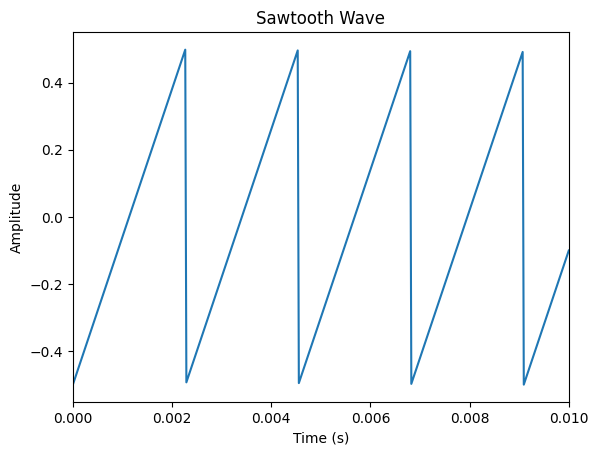

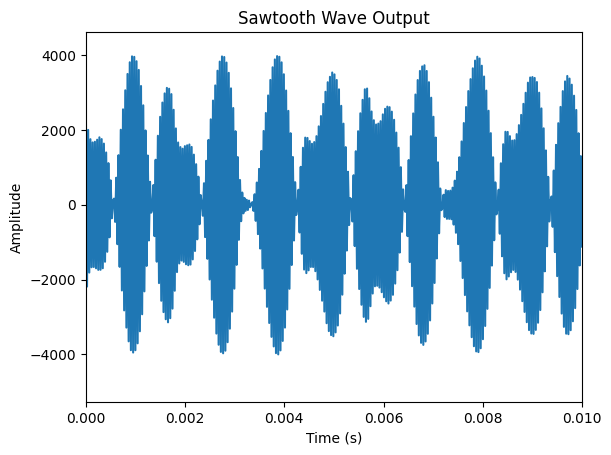

In [ ]:
sawtooth_path = "inputs/sawtooth_wave.wav"
sawtooth_output_path = "sawtooth aup/sawtooth_wave_out.wav"

sawtooth_rate, sawtooth = wavfile.read(sawtooth_path)
sawtooth_out_rate, sawtooth_out = wavfile.read(sawtooth_output_path)

#plot sawtooth
t = np.linspace(0, len(sawtooth)/sawtooth_rate, len(sawtooth))
plt.plot(t, sawtooth)
plt.title("Sawtooth Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.01)
plt.show()

#plot sawtooth output
t = np.linspace(0, len(sawtooth_out)/sawtooth_out_rate, len(sawtooth_out))
plt.plot(t, sawtooth_out)
plt.title("Sawtooth Wave Output")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.xlim(0, 0.01)
plt.show()


In [6]:
def apply_fft(data, sample_rate):
    # Perform FFT
    N = len(data)
    yf = fft(data)

    # obtener frecuencias
    xf = fftfreq(N, 1 / sample_rate)

    # Calcular magnitud y fase
    magnitude = np.abs(yf)
    phase = np.angle(yf)

    return xf[:N // 2], magnitude[:N // 2], phase[:N // 2] # devolver solo frecuencias positivas

# Dibuja el diagrama de Bode
def plot_bode(frequencies, magnitude, phase):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

    # dibujar magnitud
    ax1.plot(frequencies, 20 * np.log10(magnitude))
    ax1.set_title('Bode Diagram')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.set_xscale('log')
    ax1.grid()

    # dibujar fase
    ax2.plot(frequencies, phase * 180 / np.pi)
    ax2.set_ylabel('Phase (degrees)')
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_xscale('log')
    ax2.grid()

    plt.tight_layout()
    plt.show()

/var/folders/g0/0ymp9yy178g159xmbf9r15k40000gn/T/ipykernel_20749/3061349402.py:20: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(frequencies, 20 * np.log10(magnitude))


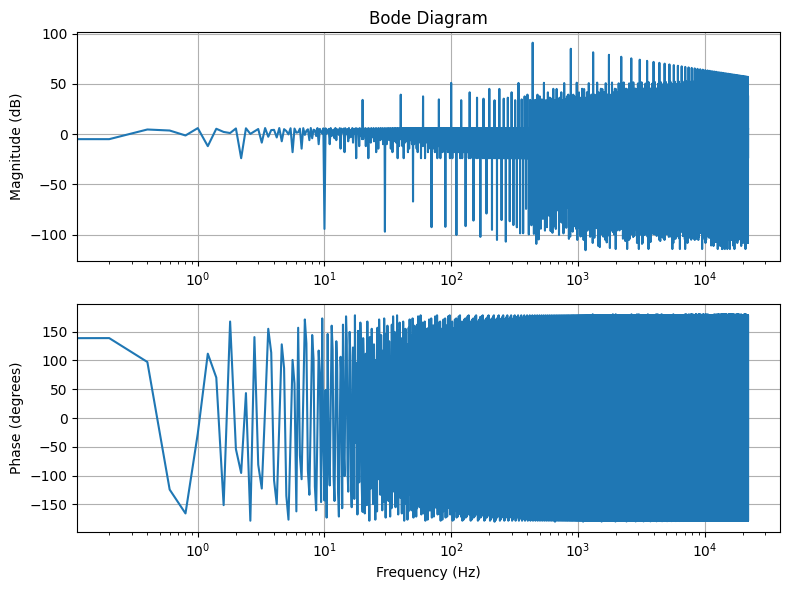

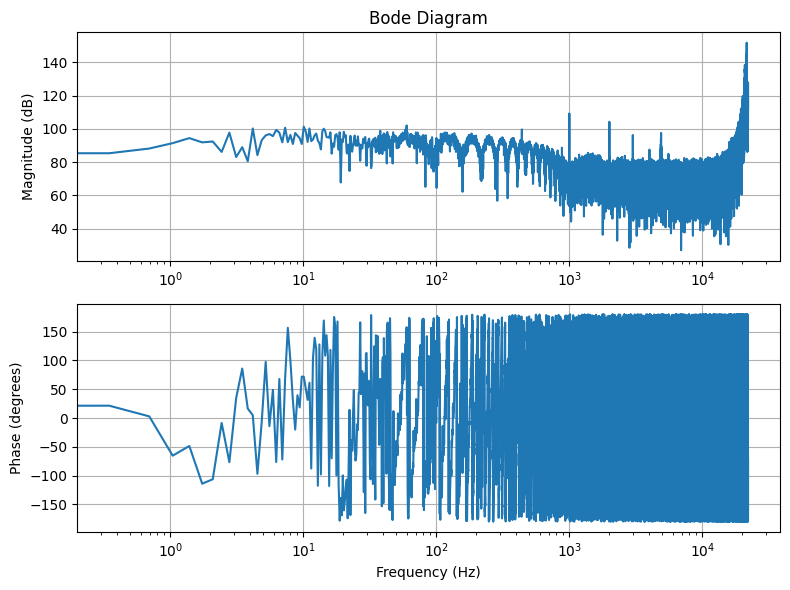

In [7]:
#bode plot sawtooth
frequencies, magnitude, phase = apply_fft(sawtooth, sawtooth_rate)
plot_bode(frequencies, magnitude, phase)

#bode plot sawtooth output
frequencies, magnitude, phase = apply_fft(sawtooth_out, sawtooth_out_rate)
plot_bode(frequencies, magnitude, phase)   